In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores

In [2]:
teste = pd.read_csv('Mall_Customers.csv') 
teste.drop(['CustomerID'], axis=1, inplace=True)   
teste.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
df = pd.read_csv('Mall_Customers.csv', index_col='Genre').drop('CustomerID', axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Male,19,15,39
Male,21,15,81
Female,20,16,6
Female,23,16,77
Female,31,17,40


In [4]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


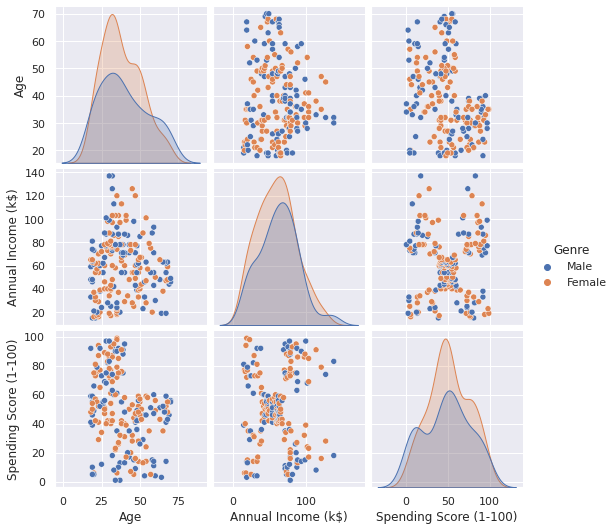

In [6]:
# fazer um pairplot com DataFrame
sns.pairplot(teste, hue='Genre')

In [7]:
# TRansformar a coluna Genre em valores numéricos sem usar o LabelEncoder
teste['Sexo'] = teste['Genre'].replace({'Male':1, 'Female':0})
teste.head()



,Genre,Age,Annual Income (k$),Spending Score (1-100),Sexo
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


<AxesSubplot:>

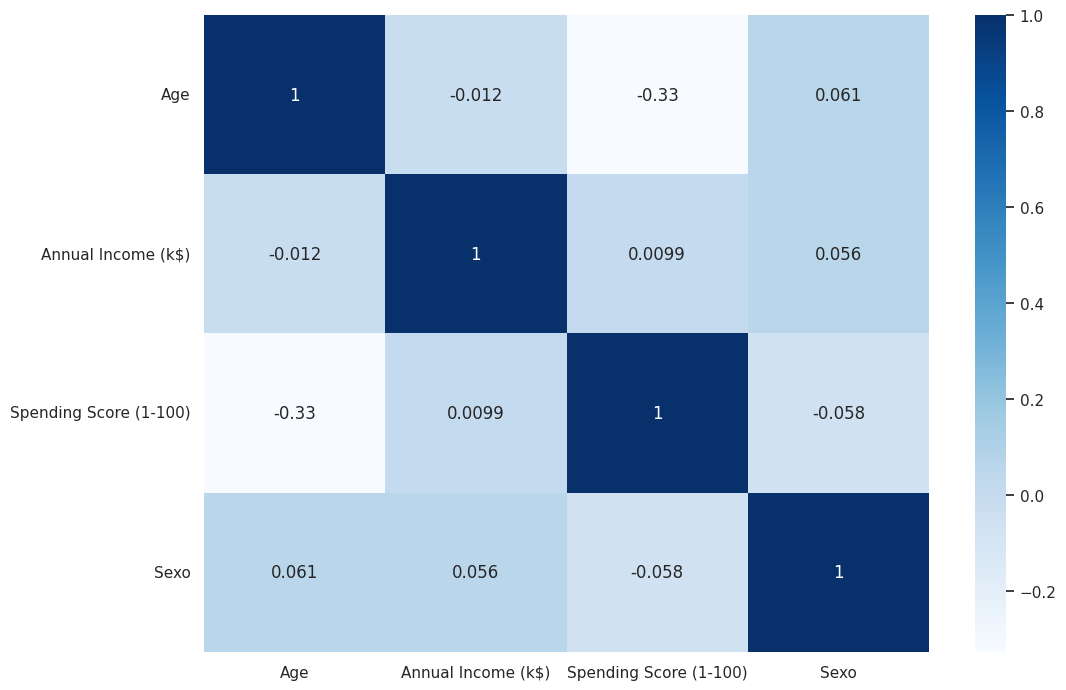

In [8]:
sns.heatmap(teste.corr(), annot=True, cmap='Blues')

In [9]:
teste_fltro = teste[teste['Age'] == 25]

teste_fltro.head(30)

,Genre,Age,Annual Income (k$),Spending Score (1-100),Sexo
21,Male,25,24,73,1
132,Female,25,72,34,0
144,Male,25,77,12,1


In [10]:
df_scaled = df.copy()
df_scaled = StandardScaler().fit_transform(df)


In [11]:
features = df.columns
features


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [12]:
from sklearn.cluster import AgglomerativeClustering


agg = AgglomerativeClustering(affinity='euclidean', linkage='ward')
df['labels'] = agg.fit_predict(df[features])

In [13]:
df.groupby('Annual Income (k$)')['labels'].value_counts()

Annual Income (k$)  labels
15                  1         2
16                  1         2
17                  1         2
18                  1         2
19                  1         4
                             ..
103                 0         4
113                 0         2
120                 0         2
126                 0         2
137                 0         2
Name: labels, Length: 68, dtype: int64

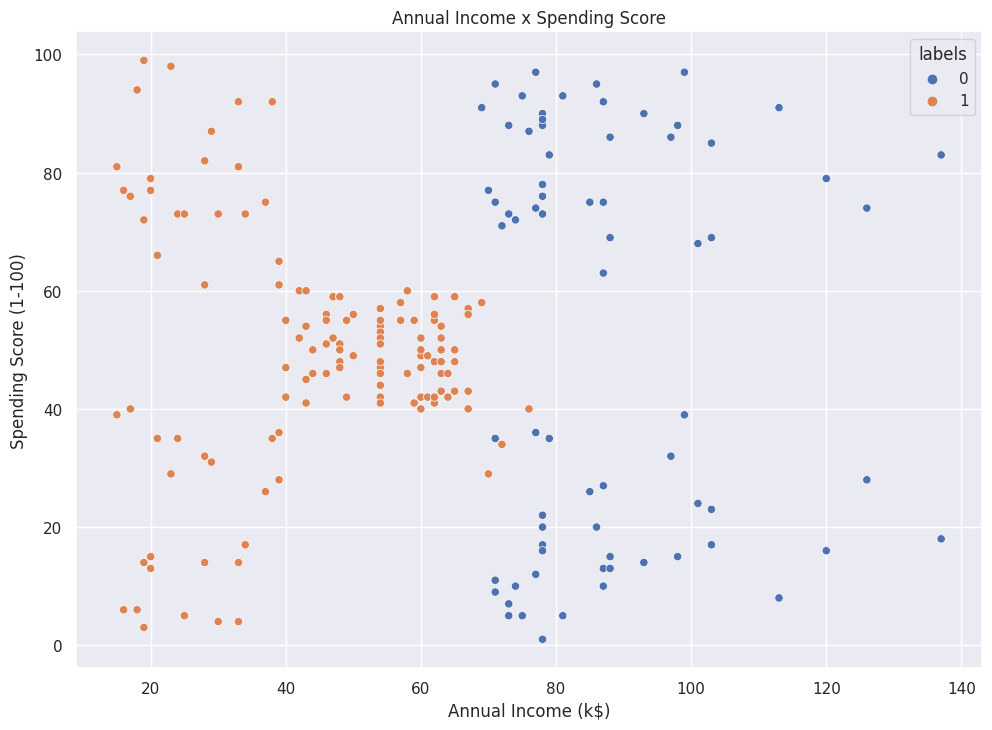

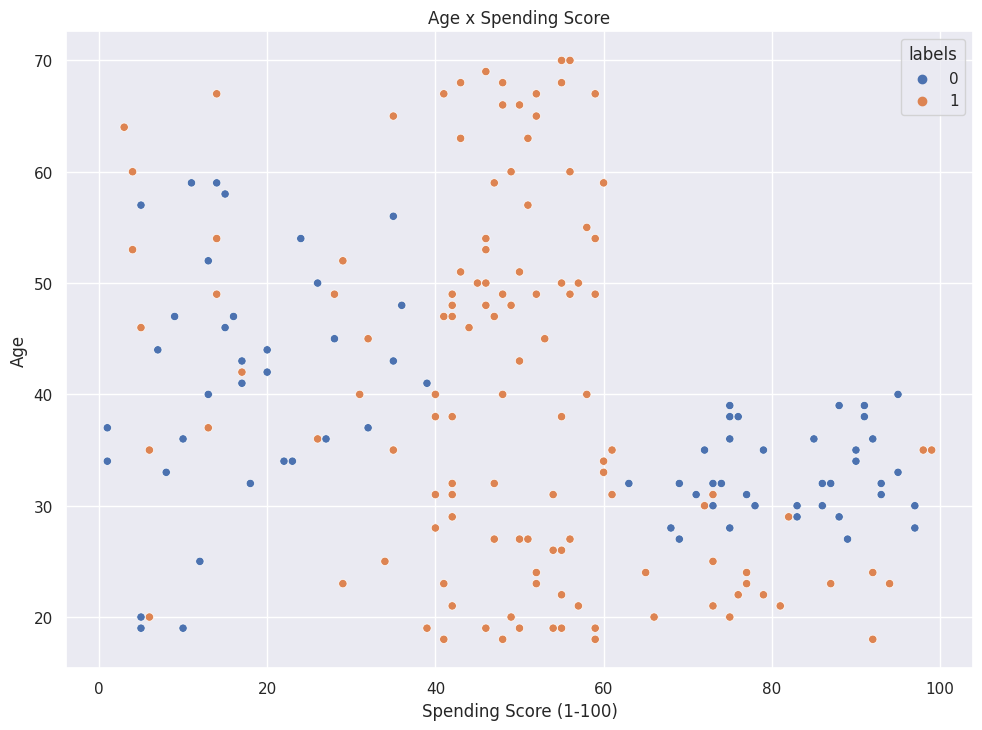

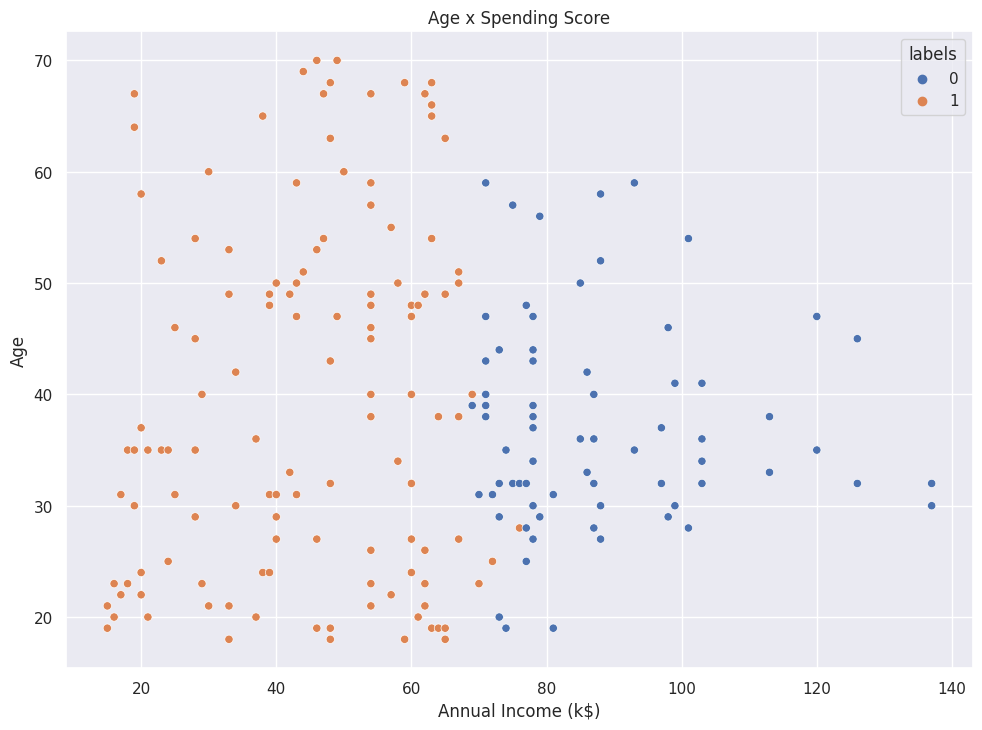

In [16]:
# construir dois sccater plots, um com o Annual Income e o Spending Score e outro com o Age e o Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='labels', data=df)
plt.title('Annual Income x Spending Score')
plt.show()

sns.scatterplot(y='Age', x='Spending Score (1-100)', hue='labels', data=df)
plt.title('Age x Spending Score')
plt.show()

sns.scatterplot(y='Age', x='Annual Income (k$)', hue='labels', data=df)
plt.title('Age x Spending Score')
plt.show()

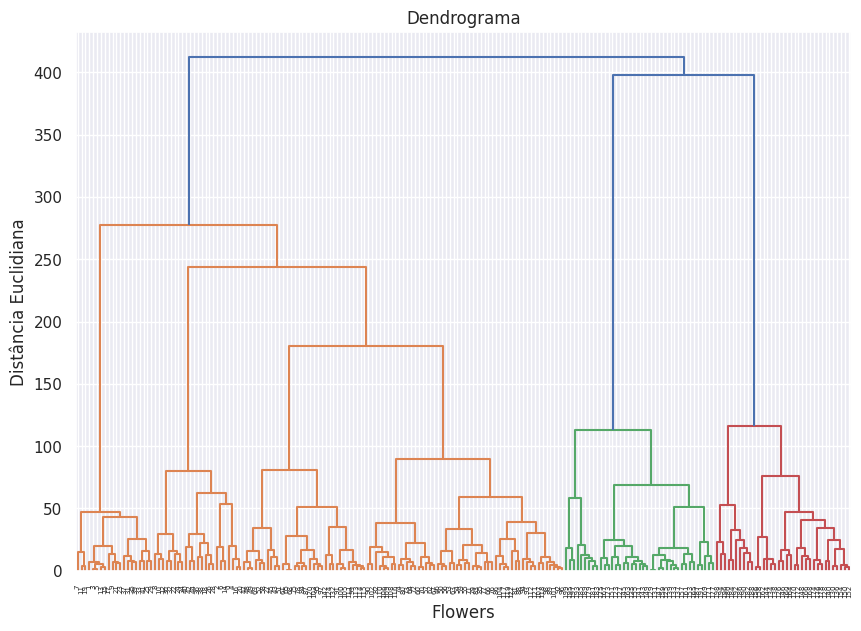

In [15]:
# Dendograma
# Path: AULA/cluster_hierarquico.ipynb
plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
plt.xlabel("Flowers")
plt.ylabel("Distância Euclidiana")
dend = dendrogram(linkage(df[features], method='ward'))